In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#Read the data from csv file and place into a data frame
df = pd.read_csv('delhi_aqi.csv')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [3]:
#Generate data statistics
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [4]:
#Return a Numpy representation of the data frame
df.values

array([['2020-11-25 01:00:00', 2616.88, 2.18, ..., 364.61, 411.73, 28.63],
       ['2020-11-25 02:00:00', 3631.59, 23.25, ..., 420.96, 486.21,
        41.04],
       ['2020-11-25 03:00:00', 4539.49, 52.75, ..., 463.68, 541.95,
        49.14],
       ...,
       ['2023-01-24 06:00:00', 1922.61, 8.16, ..., 242.49, 296.07, 12.54],
       ['2023-01-24 07:00:00', 1361.85, 9.05, ..., 165.67, 191.82, 7.47],
       ['2023-01-24 08:00:00', 1134.87, 8.61, ..., 123.76, 140.26, 5.51]],
      dtype=object)

<AxesSubplot:ylabel='Frequency'>

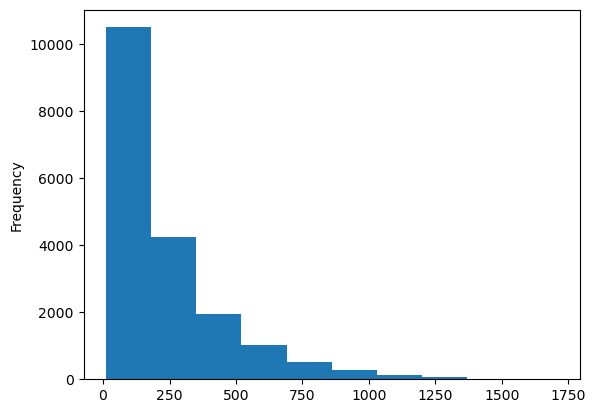

In [5]:
#Plot a histogram of dependent variable PM 2.5 concentration
plt.figure()
df['pm2_5'].plot(kind="hist") 

In [6]:
#Remove unecessary field
#y is the dependent variable
df = df.drop(["date"], axis=1)
x = df.drop("pm2_5",1)
y = df["pm2_5"]
df.head()

C:\Users\yskk9\AppData\Local\Temp\ipykernel_25684\1946253578.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop("pm2_5",1)


,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


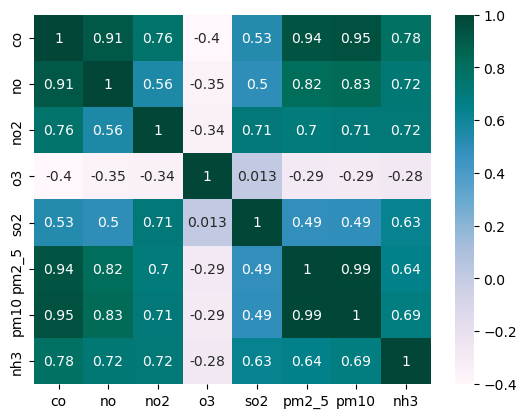

In [7]:
#Using Pearson Correlation
plt.figure()
crl = df.corr()
sns.heatmap(crl, annot=True, cmap=plt.cm.PuBuGn)
plt.show()

In [8]:
#Identify independent variables with high positive correlation to dependent variable (> 0.75)
crl_aim = abs(crl["pm2_5"])
positive_crl_aim = crl_aim[crl_aim > (0.75)]
positive_crl_aim

co       0.936830
no       0.816441
pm2_5    1.000000
pm10     0.989291
Name: pm2_5, dtype: float64

In [9]:
#Determine correlation between high positive correlation independent variables
print(df[["co","no","pm10"]].corr())

            co        no      pm10
co    1.000000  0.914129  0.950218
no    0.914129  1.000000  0.829910
pm10  0.950218  0.829910  1.000000


In [10]:
#Drop low correlation variable columns
df = df.drop(["no2","o3","so2","pm2_5","nh3"], axis=1)
df.head()

,co,no,pm10
0,2616.88,2.18,411.73
1,3631.59,23.25,486.21
2,4539.49,52.75,541.95
3,4539.49,50.96,534.00
4,4379.27,42.92,529.19


In [11]:
#Create test and train variables 
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13143, 3) (13143,)
(5633, 3) (5633,)


In [12]:
#Fit linear regression model
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(x_train, y_train)
lrm_predictions = lrm.predict(x_test)

In [13]:
#First 10 predictions to give an idea if they are accurate - look at the histogram above
lrm_predictions[0:10]

array([190.15715239, 892.30171371, 122.01018207, 319.55237141,
       236.90019557, 194.15140883, 221.49628962, 709.1543873 ,
       635.53505474, 104.3228403 ])

Text(0, 0.5, 'Predicted pm2_5 Values')

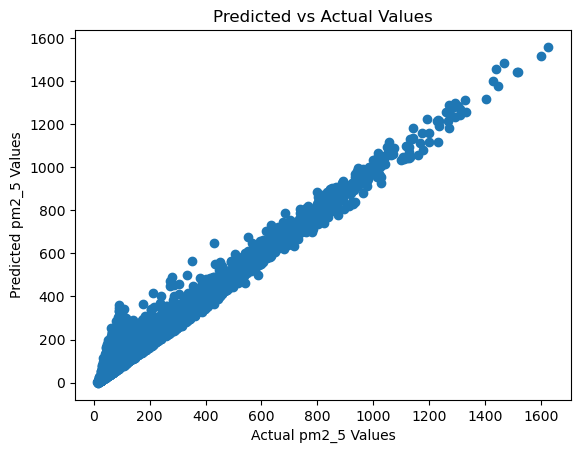

In [14]:
#Plot predictions with scatter plot 
plt.scatter(y_test, lrm_predictions)
plt.title("Predicted vs Actual Values")
plt.xlabel('Actual pm2_5 Values')
plt.ylabel('Predicted pm2_5 Values')

In [15]:
#Print score
print('Score:', lrm_model.score(x_test, y_test))

Score: 0.9795144581053974


In [16]:
#Print predictions
print(lrm_predictions)

[190.15715239 892.30171371 122.01018207 ... 463.19969404 197.64895315
 441.24383741]


In [17]:
#Print the actual value, predicted value and other independent variables with high correlation
df2 = pd.DataFrame(x_test)
df2['pm2_5 Actual value'] = y_test
df2['pm2_5 Predicted value'] = lrm_predictions
df2.head()

,co,no,pm10,pm2_5 Actual value,pm2_5 Predicted value
16585,1869.20,6.26,241.52,191.61,190.157152
677,10360.72,153.78,1077.96,931.24,892.301714
17300,1335.14,0.00,161.19,139.68,122.010182
2361,2136.23,2.29,391.84,344.54,319.552371
1662,1428.60,6.82,294.19,267.35,236.900196


In [18]:
#Save this data as another .csv file
df2.to_csv('delhi_aqi - results.csv')